# `PROBLEM STATEMENT`

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes:
    0. Airplanes
    1. Cars
    2. Birds
    3. Cats
    4. Deer
    5. Dogs
    6. Frogs
    7. Horses
    8. Ships
    9. Trucks


- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications.
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32).

# `STEP 0: IMPORTING CORE LIBRARIES AND DATASET`

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from keras.datasets import cifar10

(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


# `STEP 1: GET INTUITION ABOUT DATASET`

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
X_train[1], y_train[1]

(array([[[154, 177, 187],
         [126, 137, 136],
         [105, 104,  95],
         ...,
         [ 91,  95,  71],
         [ 87,  90,  71],
         [ 79,  81,  70]],
 
        [[140, 160, 169],
         [145, 153, 154],
         [125, 125, 118],
         ...,
         [ 96,  99,  78],
         [ 77,  80,  62],
         [ 71,  73,  61]],
 
        [[140, 155, 164],
         [139, 146, 149],
         [115, 115, 112],
         ...,
         [ 79,  82,  64],
         [ 68,  70,  55],
         [ 67,  69,  55]],
 
        ...,
 
        [[175, 167, 166],
         [156, 154, 160],
         [154, 160, 170],
         ...,
         [ 42,  34,  36],
         [ 61,  53,  57],
         [ 93,  83,  91]],
 
        [[165, 154, 128],
         [156, 152, 130],
         [159, 161, 142],
         ...,
         [103,  93,  96],
         [123, 114, 120],
         [131, 121, 131]],
 
        [[163, 148, 120],
         [158, 148, 122],
         [163, 156, 133],
         ...,
         [143, 133, 139],
  

# `STEP 2: DATA CLEANING`

## CLEANED DATA

# `STEP 3: VISUALIZING DATASET`

In [ ]:
classes = {
0: 'Airplane', 1:'Car', 2:'Bird', 3:'Cat', 4:'Deer', 5:'Dog', 6:'Frog', 7:'Horse', 8:'Ship', 9:'Truck'}

def imshw(ax,subplotsCount):
    num = np.random.randint(0, X_train.shape[0])
    ax.imshow(np.array(X_train[num]).reshape(32,32,3))
    yc = -(0.1 + 0.01*subplotsCount)
    ax.set_title(classes[int(y_train[num])], fontsize = 8,y=yc)
    ax.axis('off')

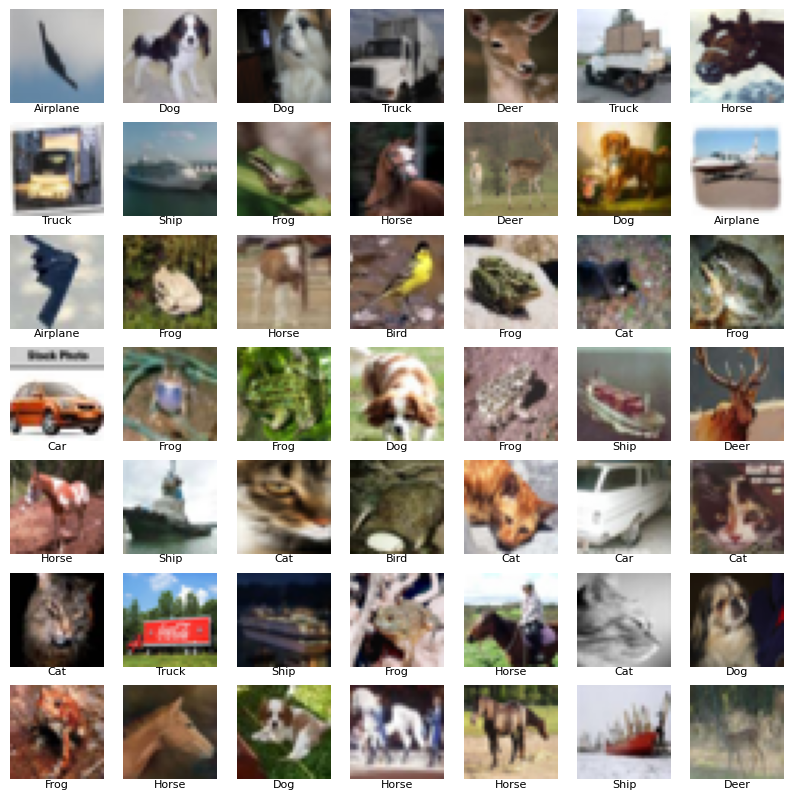

In [ ]:
subs = 7
fg, axs = plt.subplots(subs, subs, figsize=(10,10))
axs = axs.ravel()
for ax in axs:
    imshw(ax, subs)

# `STEP 4: FEATURE ENGINEERING`

## NO NEED for this step as we will use CNN

# `STEP 5: SPLIT then PREPROCESSING DATA`

  - already splited into train-test and we will use cross validation

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
y_train_ohe = ohe.fit_transform(y_train).astype('float32')
y_test_ohe = ohe.transform(y_test).astype('float32')

In [ ]:
X_train = X_train/255
X_test = X_test/255

# `STEP 6: MODELS TRAINING && Evaluation`

## my CNN

### Training

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout, InputLayer
from keras.callbacks import TensorBoard

In [ ]:
cnn_model = Sequential()
cnn_model.add(InputLayer((32,32,3), name='I'))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', name='C1'))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', name='C2'))
cnn_model.add(MaxPooling2D(2,2, name='P1'))
cnn_model.add(Dropout(0.4, name='Drop1'))


cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', name='C3'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', name='C4'))
cnn_model.add(MaxPooling2D(2,2, name='P2'))
cnn_model.add(Dropout(0.4, name='Drop2'))

cnn_model.add(Flatten(name='F'))

cnn_model.add(Dense(units = 512, activation = 'relu', name='D1'))

cnn_model.add(Dense(units = 256, activation = 'relu', name='D2'))

cnn_model.add(Dense(units = 10, activation = 'softmax', name='O'))


In [ ]:
cnn_model.summary()

In [ ]:
from keras.src.utils.vis_utils import plot_model
plot_model(cnn_model)

In [ ]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = cnn_model.fit(X_train, y_train_ohe, batch_size = 64, epochs = 10, shuffle = True)

### Evaluation

In [ ]:
from keras.src.saving.legacy.save import load_model
cnn_model = load_model('/content/drive/MyDrive/saved_models/my_model_cifar10.h5')

In [ ]:
cnn_model.evaluate(X_test, y_test_ohe)

313/313 [==============================] - 30s 95ms/step - loss: 0.6704 - accuracy: 0.7727


[0.6703987121582031, 0.7727000117301941]

In [ ]:
y_test_hat = cnn_model.predict(X_test).argmax(1)
y_test_hat

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_hat)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True, fmt='g')

## RESNET-50

### Training

In [ ]:
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.layers import Lambda, UpSampling2D, GlobalAveragePooling2D

res_model = ResNet50(input_shape=(224,224,3), include_top=False, weights='imagenet')
# res_model.trainable = False

In [ ]:
tflr_model = Sequential()

tflr_model.add(InputLayer(input_shape=(32,32,3), name='I'))
tflr_model.add(UpSampling2D(size=(7,7), name='UPS'))

# tflr_model.add(Lambda(preprocess_input, name='LM'))
tflr_model.add(res_model)

tflr_model.add(GlobalAveragePooling2D(name='GAP'))
tflr_model.add(Flatten(name='F'))
tflr_model.add(Dense(1024, activation="relu", name='D1'))
tflr_model.add(Dense(512, activation="relu", name='D2'))
tflr_model.add(Dense(units = 10, activation = 'softmax', name='O'))

tflr_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 UPS (UpSampling2D)          (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 GAP (GlobalAveragePooling2  (None, 2048)              0         
 D)                                                              
                                                                 
 F (Flatten)                 (None, 2048)              0         
                                                                 
 D1 (Dense)                  (None, 1024)              2098176   
                                                                 
 D2 (Dense)                  (None, 512)               524800    
                                                      

In [ ]:
plot_model(tflr_model)

In [ ]:
tflr_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = tflr_model.fit(X_train, y_train_ohe, batch_size = 64, epochs = 5, shuffle = True)

### Evaluation

In [ ]:
from keras.src.saving.legacy.save import load_model
net50 = load_model('/content/drive/MyDrive/saved_models/ResNet_50_cifar10.h5')

In [ ]:
net50.evaluate(X_test, y_test_ohe)

313/313 [==============================] - 36s 104ms/step - loss: 0.4294 - accuracy: 0.8836


[0.42944326996803284, 0.8835999965667725]

# STEP 7: IMPROVING THE MODEL WITH DATA AUGMENTATION

# STEP 8: SAVING THE MODEL

In [ ]:
import os
model_path = os.path.join("/content/drive/My Drive/saved_models", 'ResNet_50_cifar10.h5')
tflr_model.save(model_path)

model_path = os.path.join("/content/drive/My Drive/saved_models", 'my_model_cifar10.h5')
cnn_model.save(model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
